In [55]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
# перестановочный критерий
from permute.core import two_sample
import itertools

# бутстрап
from arch.bootstrap import IIDBootstrap

# критерий знаков
from statsmodels.stats.descriptivestats import sign_test

In [4]:
data = pd.read_csv('../../homework_data/sem_3/ugnivenko.va.csv', header=None) 

In [6]:
data.head()

,0
0,1.676261
1,0.459387
2,-0.258930
3,-0.895539
4,-0.877436


In [27]:
x = data[0].values

In [28]:
x

array([ 1.67626146,  0.45938726, -0.25893036, -0.89553888, -0.87743606,
       -0.58645159, -0.67529783,  1.51807191, -0.38968517,  0.81097953,
       -0.71609733,  0.7737122 , -0.97301306, -0.3743573 ,  0.62540642,
       -0.00992143,  0.54428727, -1.90974752, -3.13719925, -0.35449871])

### Применим ли t-критерий для проверки равенства среднего нулю для данной выборки? 

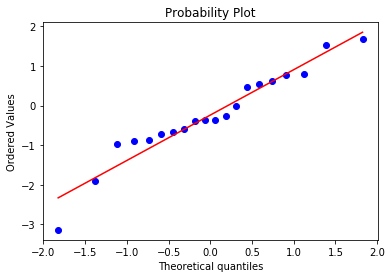

In [50]:
st.probplot(x, plot = plt)
plt.show()

Можно - распределение нормальное

### p-value для критерия Уилкоксона (m0=0) 

In [31]:
st.wilcoxon(x)

WilcoxonResult(statistic=82.0, pvalue=0.39053287003351767)

In [37]:
print("p-value = ", np.around(st.wilcoxon(x)[1], decimals = 2))

p-value =  0.39


### p-value для критерия знаков (m0=0)

In [35]:
sign_test(x)

(-3.0, 0.2631759643554687)

In [38]:
print("p-value = ", np.around(sign_test(x)[1], decimals = 2))

p-value =  0.26


### Рассмотрим перестановочный критерий для среднего. Сколько перестановок возможно для данной выборки? 

In [52]:
print("number of permutations = ", 2**len(x))

number of permutations =  1048576


### Рассмотрим перестановочный критерий для проверки среднего (m0=0.5). Для какого количества перестановок статистика T будет иметь значение меньшее или равное статистике для оригинальной выборки? 

In [64]:
T = x - 0.5
t=np.sum(T)
count = 0
good = 0
for v in itertools.product([-1, 1], repeat=len(x)):
    count +=1
    stat = np.dot(T, v)
    if stat<=t:
        good+=1
    
        
good/count

0.0033102035522460938

In [65]:
print("p-value = ", np.around(good/count, decimals = 2))

p-value =  0.0


### Левая граница доверительного интервала для среднего выборки

In [47]:
from arch.bootstrap import IIDBootstrap
bs = IIDBootstrap(x)
bs.conf_int(np.mean, 1000, method='basic')

array([[-0.72954559],
       [ 0.26206204]])

In [40]:
print("left border = ", np.around(bs.conf_int(np.mean, 1000, method='basic')[0], decimals = 2))

left border =  [-0.72]


### Правая граница доверительного интервала для среднего выборк

In [48]:
print("right border = ", np.around(bs.conf_int(np.mean, 1000, method='basic')[1], decimals = 2))

right border =  [0.24]
